<a href="https://colab.research.google.com/github/Rocks-n-Code/PythonCourse/blob/master/SaltCavernWorkflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salt Cavern Workflows with Python

- Well spot creation with *geopandas*
- Well deviation survey with *wellpathpy*
- Sonar file processing with *SaltPy*
- 3D Visualization with *PyVista*

In [26]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely import Point, LineString
import folium
import folium.plugins as plugins

pd.set_option('display.max_columns', None)

___

Let's make a GIS file for the location of well. In this case we will use PPG007B as an example.




*All data is publically avalible through [SONRIS](https://sonlite.dnr.state.la.us/ords/f?p=108:2).*

[PPG 007B Deviation Survey](https://sonlite.dnr.state.la.us/dnrservices/redirectUrl.jsp?dDocname=14325104&showInline=True)



POINT Z (2623600 643684 12.6)


<Axes: >

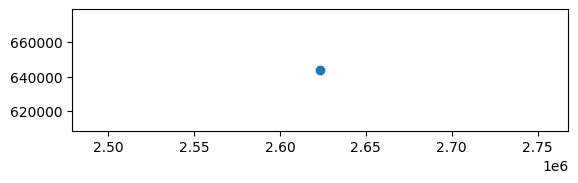

In [19]:
x,y,z = 2623600.00, 643684.00, 12.6
crs = 'EPSG:26982'
crs = 'ESRI:103058'
crs = 'EPSG:3452'
point = Point(x,y,z)
print(point)

wells = gpd.GeoDataFrame({'Well_No':['PPG-007B'],
                          'serial_no':[67270],
                          'geometry':[point]},
                         crs=crs)
wells.plot()

In [28]:
# Change Coordinate Referance System
wells_wgs84 = wells.to_crs('EPSG:4326')
point = wells_wgs84.at[0,'geometry']
x0,y0 = [p[0] for p in point.xy]
print(x0,y0)

## View with Folium
m = folium.Map(location=[y0,x0],
               tiles='Cartodb dark_matter',
               zoom_start=13)

# Add a marker
folium.Marker(
              [y0,x0],
              popup='PPG 007B',
              icon=plugins.BeautifyIcon(
                              icon="circle-small",
                              icon_shape="circle",
                              border_color='blue',
                              background_color='lightblue'
                          )
              ).add_to(m)

m

-93.41509792962904 30.25358561957733


In [ ]:
## Save File
wells.to_file('./')

In [2]:
## Public Data Source
# PPG 7
# 	DEVIATION SURVEY
print'https://sonlite.dnr.state.la.us/dnrservices/redirectUrl.jsp?dDocname=14325104&showInline=True'

from pdf2image import convert_from_path

images = convert_from_path(url)
images[0]  # first page


ModuleNotFoundError: No module named 'pdf2image'

In [4]:
import requests
from IPython.display import IFrame

# Original redirect URL
redirect_url = "https://sonlite.dnr.state.la.us/dnrservices/redirectUrl.jsp?dDocname=14325104&showInline=True"

# Get the actual PDF URL by following the redirect
response = requests.get(redirect_url, allow_redirects=True)
pdf_url = response.url

# Display the final resolved PDF URL (optional)
print("Resolved PDF URL:", pdf_url)

# Embed the PDF using IFrame
IFrame(pdf_url, width=800, height=600)


Resolved PDF URL: https://sonlite.dnr.state.la.us/dnrservices/redirectUrl.jsp?dDocname=14325104&showInline=True
